In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [14]:
customer_df.columns = list(map(lambda x: x.lower(),customer_df.columns))
customer_df.columns.unique()

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [15]:
#Find all of the categorical data. Save it in a categorical_df variable.
categorical_df  = customer_df.select_dtypes(object)
categorical_df.head()

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [16]:
#Check for NaN values.
categorical_df.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective to date    0
employmentstatus     0
gender               0
location code        0
marital status       0
policy type          0
policy               0
renew offer type     0
sales channel        0
vehicle class        0
vehicle size         0
dtype: int64

In [17]:
for col in categorical_df:
    print(categorical_df[col].unique())

['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
['No' 'Yes']
['Basic' 'Extended' 'Premium']
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
['F' 'M']
['Suburban' 'Rural' 'Urban']
['Married' 'Single' 'Divorced']
['Corporate Auto' 'Personal Auto' 'Special Auto']
['Co

In [18]:
for col in categorical_df:
    display(categorical_df[col].unique())

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

array(['No', 'Yes'], dtype=object)

array(['Basic', 'Extended', 'Premium'], dtype=object)

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

array(['F', 'M'], dtype=object)

array(['Suburban', 'Rural', 'Urban'], dtype=object)

array(['Married', 'Single', 'Divorced'], dtype=object)

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

array(['Medsize', 'Small', 'Large'], dtype=object)

In [19]:
pd.Series({col:categorical_df[col].unique() for col in categorical_df})

customer             [BU79786, QZ44356, AI49188, WW63253, HB64268, ...
state                [Washington, Arizona, Nevada, California, Oregon]
response                                                     [No, Yes]
coverage                                    [Basic, Extended, Premium]
education            [Bachelor, College, Master, High School or Bel...
effective to date    [2/24/11, 1/31/11, 2/19/11, 1/20/11, 2/3/11, 1...
employmentstatus     [Employed, Unemployed, Medical Leave, Disabled...
gender                                                          [F, M]
location code                                 [Suburban, Rural, Urban]
marital status                             [Married, Single, Divorced]
policy type              [Corporate Auto, Personal Auto, Special Auto]
policy               [Corporate L3, Personal L3, Corporate L2, Pers...
renew offer type                      [Offer1, Offer3, Offer2, Offer4]
sales channel                        [Agent, Call Center, Web, Branch]
vehicl

In [20]:
#Check dtypes. Do they all make sense as categorical data?
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
effective to date    object
employmentstatus     object
gender               object
location code        object
marital status       object
policy type          object
policy               object
renew offer type     object
sales channel        object
vehicle class        object
vehicle size         object
dtype: object

In [21]:
#Does any column contain alpha and numeric data? Decide how to clean it.

# whether alpha numeric values present in Quarters column of dataframe in Python
pd.to_numeric(categorical_df['customer'] , errors='coerce').notnull().all()


False

In [22]:
pd.to_numeric(categorical_df['state'] , errors='coerce').notnull().all()

False

In [23]:
pd.to_numeric(categorical_df['response'] , errors='coerce').notnull().all()

False

In [24]:

pd.to_numeric(categorical_df['coverage'] , errors='coerce').notnull().all()

False

In [25]:

pd.to_numeric(categorical_df['education'] , errors='coerce').notnull().all()

False

In [26]:

pd.to_numeric(categorical_df['effective to date'] , errors='coerce').notnull().all()

False

In [27]:

pd.to_numeric(categorical_df['employmentstatus'] , errors='coerce').notnull().all()

False

In [28]:

pd.to_numeric(categorical_df['gender'] , errors='coerce').notnull().all()

False

In [29]:
pd.to_numeric(categorical_df['location code'] , errors='coerce').notnull().all()

False

In [30]:
pd.to_numeric(categorical_df['marital status'] , errors='coerce').notnull().all()

False

In [31]:
pd.to_numeric(categorical_df['policy type'] , errors='coerce').notnull().all()

False

In [32]:
pd.to_numeric(categorical_df['policy'] , errors='coerce').notnull().all()

False

In [33]:
pd.to_numeric(categorical_df['renew offer type'] , errors='coerce').notnull().all()

False

In [34]:
pd.to_numeric(categorical_df['sales channel'] , errors='coerce').notnull().all()

False

In [35]:
pd.to_numeric(categorical_df['vehicle class'] , errors='coerce').notnull().all()

False

In [36]:
pd.to_numeric(categorical_df['vehicle size'] , errors='coerce').notnull().all()

False

In [37]:

print("\nWhether all characters in the string are alphanumeric?")
categorical_df['name_code_is_alphanumeric'] = list(map(lambda x: x.isalnum(), categorical_df['customer']))
print (categorical_df)


Whether all characters in the string are alphanumeric?
     customer       state response  coverage education effective to date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     employmentstatus gender lo

In [38]:
#Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.



In [39]:
#Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
categorical_df['policy']

0       Corporate L3
1        Personal L3
2        Personal L3
3       Corporate L2
4        Personal L1
            ...     
9129     Personal L1
9130    Corporate L3
9131    Corporate L2
9132     Personal L2
9133    Corporate L3
Name: policy, Length: 9134, dtype: object

In [40]:
categorical_df['policy type']

0       Corporate Auto
1        Personal Auto
2        Personal Auto
3       Corporate Auto
4        Personal Auto
             ...      
9129     Personal Auto
9130    Corporate Auto
9131    Corporate Auto
9132     Personal Auto
9133    Corporate Auto
Name: policy type, Length: 9134, dtype: object

In [41]:
categorical_df['policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [42]:
categorical_df['policy type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [43]:
customer_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [44]:
categorical_df['policy type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy type, dtype: int64

In [45]:
# policy is the categorie of policy type

In [46]:
#Check number of unique values in each column, can they be combined in any way to ease encoding?
#Comment your thoughts and make those changes.
pd.Series({col:categorical_df[col].unique() for col in categorical_df})

customer                     [BU79786, QZ44356, AI49188, WW63253, HB64268, ...
state                        [Washington, Arizona, Nevada, California, Oregon]
response                                                             [No, Yes]
coverage                                            [Basic, Extended, Premium]
education                    [Bachelor, College, Master, High School or Bel...
effective to date            [2/24/11, 1/31/11, 2/19/11, 1/20/11, 2/3/11, 1...
employmentstatus             [Employed, Unemployed, Medical Leave, Disabled...
gender                                                                  [F, M]
location code                                         [Suburban, Rural, Urban]
marital status                                     [Married, Single, Divorced]
policy type                      [Corporate Auto, Personal Auto, Special Auto]
policy                       [Corporate L3, Personal L3, Corporate L2, Pers...
renew offer type                              [Offer

In [47]:
# Lab | Feature extraction

In [48]:
categoricals = categorical_df.select_dtypes(np.object)
categoricals.head()

C:\Users\NON\AppData\Local\Temp/ipykernel_2544/3595458896.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = categorical_df.select_dtypes(np.object)


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


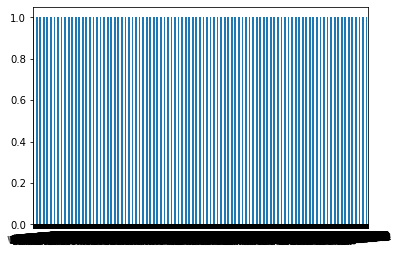

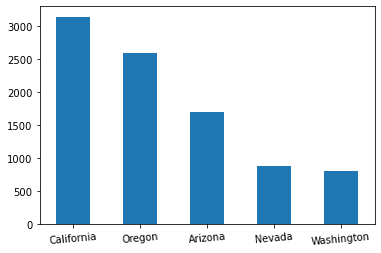

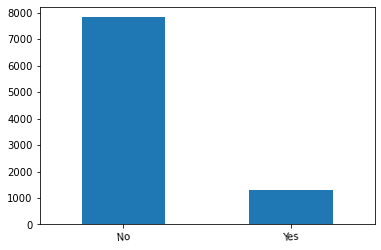

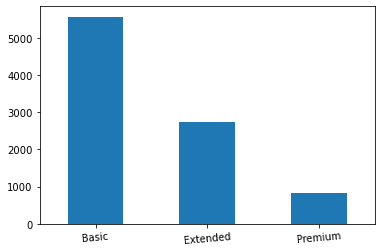

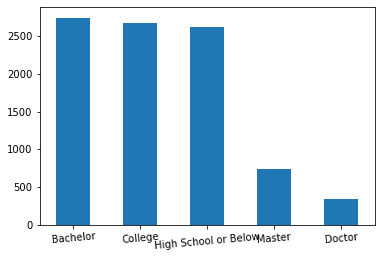

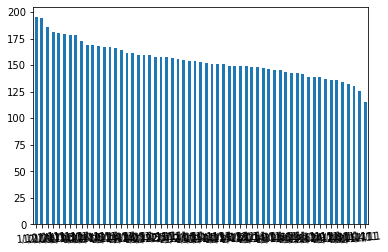

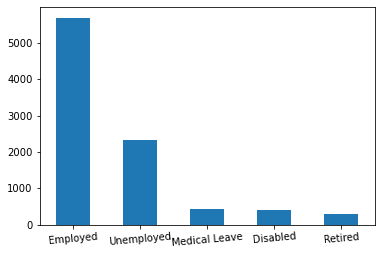

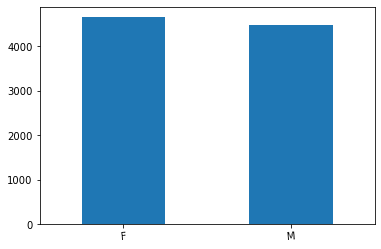

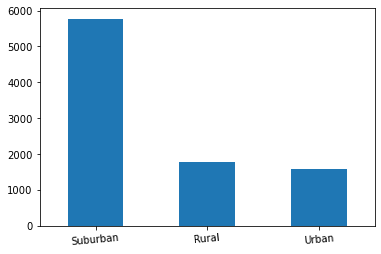

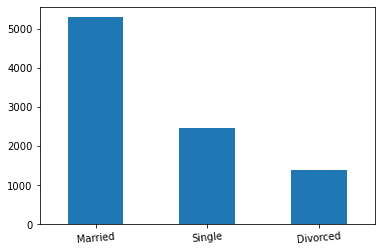

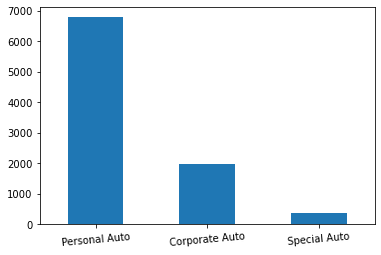

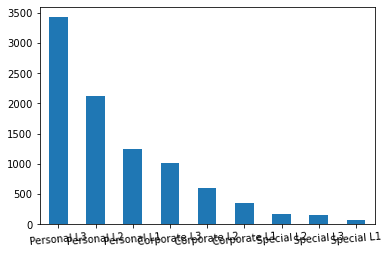

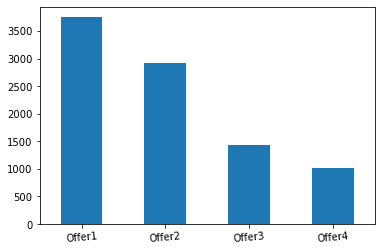

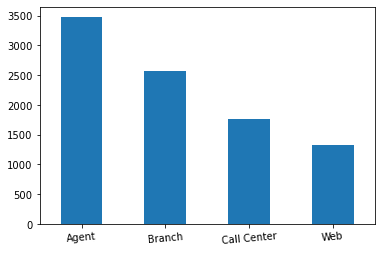

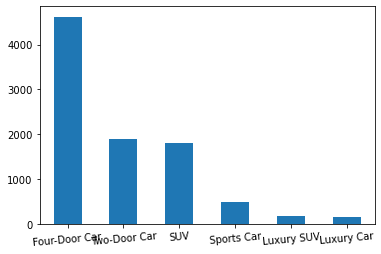

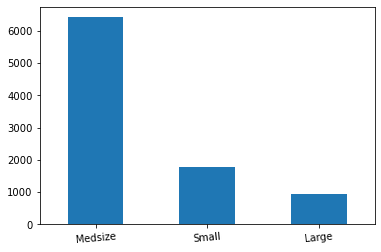

In [52]:
#Plot all the categorical variables with the proper plot. What can you see?

for col in categoricals.columns:
    categoricals[col].value_counts().plot.bar(rot=5)

    plt.show()

In [ ]:
# the variable haven't a normal distribution

In [ ]:
    #There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
    
    

In [54]:
categoricals['effective to date'] = pd.to_datetime(categoricals['effective to date'])

In [55]:
categoricals

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


<AxesSubplot:>

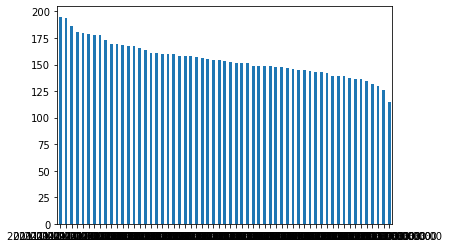

In [56]:
categoricals['effective to date'].value_counts().plot.bar(rot=0)


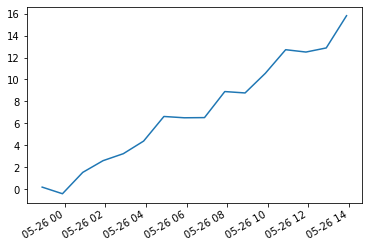

In [58]:
import datetime
import random
import matplotlib.pyplot as plt

# make up some data
x = [datetime.datetime.now() + datetime.timedelta(hours=i) for i in range(16)]
y = [i+random.gauss(0,1) for i,_ in enumerate(x)]

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [67]:
def continious_plot2(df):
    for i in df.columns:
        sns.countplot(x=i, data = categorical_df);
        plt.show()
    return
    


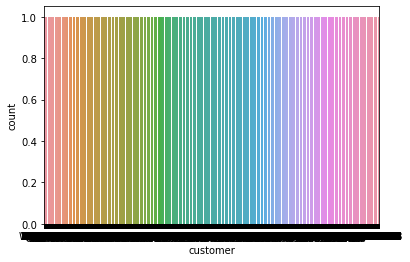

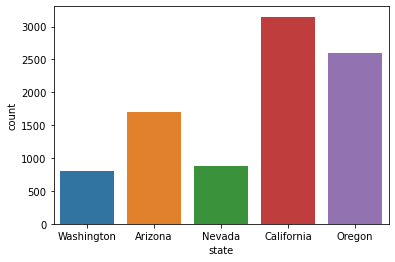

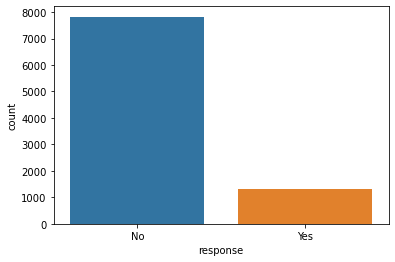

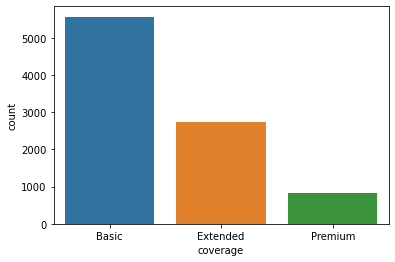

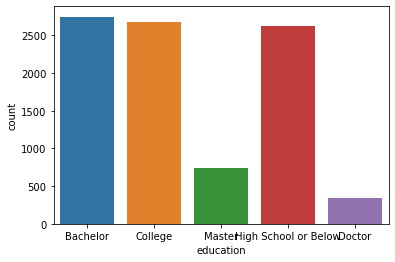

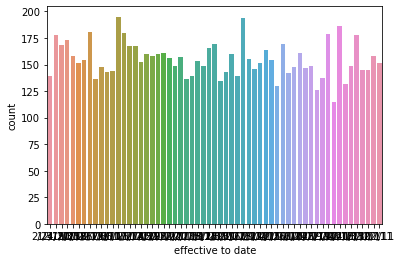

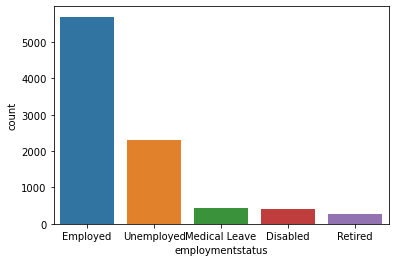

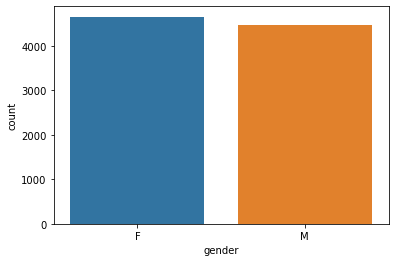

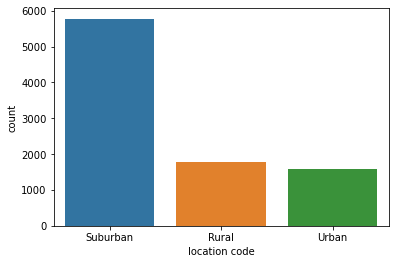

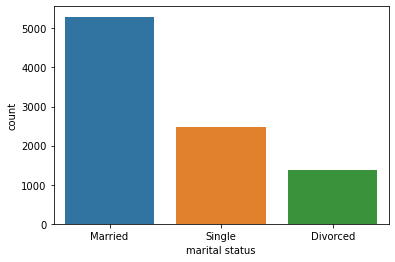

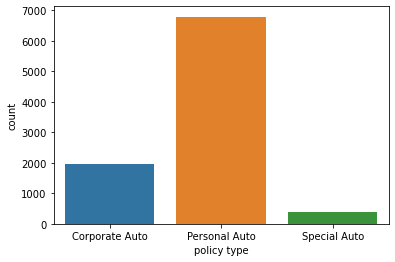

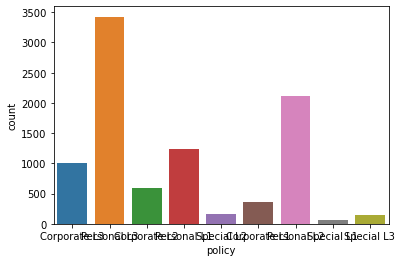

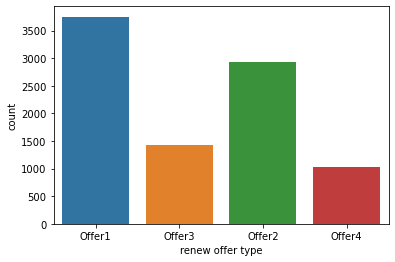

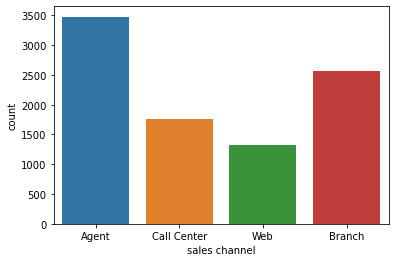

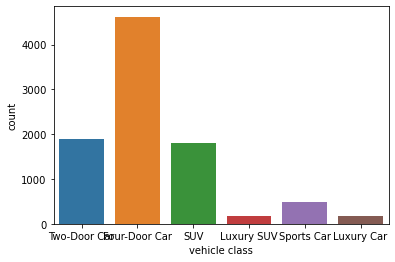

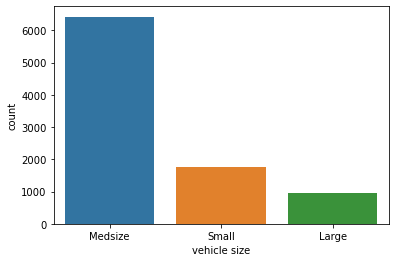

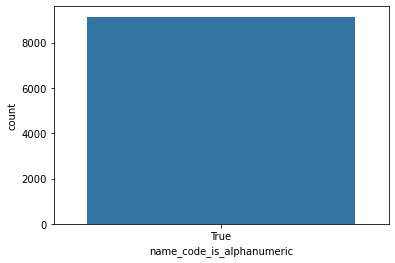

In [69]:
 for i in categorical_df.columns:
        sns.countplot(x=i, data = categorical_df);
        plt.show()

In [70]:
categoricals['effective to date'] = pd.to_datetime(categoricals['effective to date'])

In [71]:
categoricals

,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [73]:
categoricals['day'] = categoricals['effective to date'].dt.weekday

categoricals['month'] = categoricals['effective to date'].dt.month

In [74]:
categoricals['day']

0       3
1       0
2       5
3       3
4       3
       ..
9129    3
9130    5
9131    6
9132    3
9133    0
Name: day, Length: 9134, dtype: int64

<AxesSubplot:>

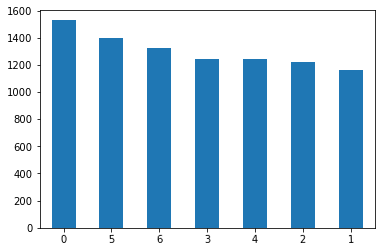

In [75]:
categoricals['day'].value_counts().plot.bar(rot=2)

<AxesSubplot:>

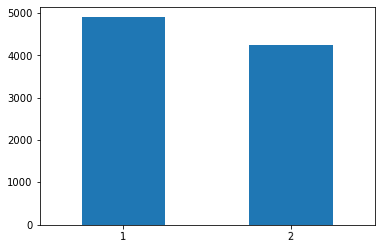

In [76]:
categoricals['month'].value_counts().plot.bar(rot=2)